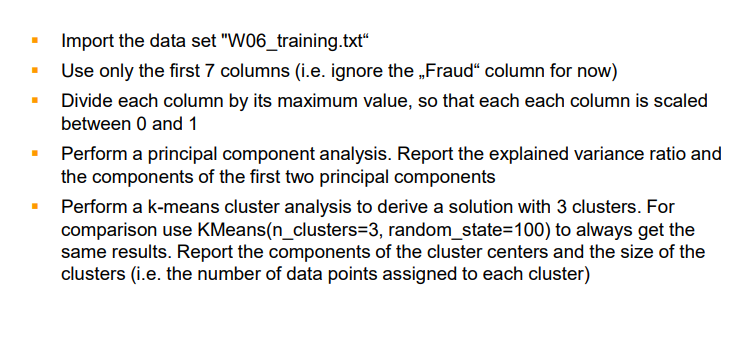


In [218]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/w06-training/W06_training.txt
/kaggle/input/utilss/utils.py


In [219]:
df= pd.read_csv('../input/w06-training/W06_training.txt',sep =';')
df.head(10)

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities,Fraud
0,2,1401,58.83,17,2,7,1,0
1,2,655,57.20,6,7,1,4,0
2,4,770,36.00,28,11,3,4,0
3,5,272,89.76,1,4,0,2,0
4,6,1511,8.75,15,0,7,4,0
5,1,862,15.54,17,7,6,3,0
6,2,43,92.50,22,0,10,3,0
7,3,775,10.95,15,8,5,0,0
8,6,183,9.44,18,1,4,1,0
9,1,827,21.61,20,9,3,0,0


In [220]:
#Divide each cell in dataframe by max of that column in pandas

df = df.apply(lambda x: x / x.max())

In [221]:
df

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities,Fraud
0,0.333333,0.729308,0.560713,0.566667,0.181818,0.7,0.2,0.0
1,0.333333,0.340968,0.545177,0.200000,0.636364,0.1,0.8,0.0
2,0.666667,0.400833,0.343119,0.933333,1.000000,0.3,0.8,0.0
3,0.833333,0.141593,0.855509,0.033333,0.363636,0.0,0.4,0.0
4,1.000000,0.786569,0.083397,0.500000,0.000000,0.7,0.8,0.0
...,...,...,...,...,...,...,...,...
299995,1.000000,0.468506,0.300229,0.500000,0.090909,0.9,0.4,0.0
299996,0.666667,0.726184,0.219405,0.366667,0.090909,0.6,0.0,0.0
299997,0.666667,0.068194,0.836352,0.900000,0.090909,0.3,0.0,0.0
299998,0.333333,0.897449,0.908597,0.666667,0.909091,0.8,0.6,0.0


# PCA

In [222]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [223]:
x = df.iloc[:,:7]  #features
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(x)
pca.get_covariance()

array([[ 8.10185114e-02, -1.52888173e-04, -7.11306513e-05,
        -2.96293348e-04, -1.88315311e-04,  2.80282530e-04,
        -5.45910709e-05],
       [-1.52888173e-04,  7.59451691e-02, -1.35104402e-04,
        -7.20243969e-05, -2.40736298e-05, -4.07404526e-05,
         1.24179187e-05],
       [-7.11306513e-05, -1.35104402e-04,  7.60657464e-02,
        -1.02840987e-04,  5.54039213e-05,  1.63973331e-04,
         1.07511393e-04],
       [-2.96293348e-04, -7.20243969e-05, -1.02840987e-04,
         8.34782994e-02,  1.87771329e-05, -3.09895702e-04,
        -3.51416610e-04],
       [-1.88315311e-04, -2.40736298e-05,  5.54039213e-05,
         1.87771329e-05,  9.81627577e-02,  3.48885684e-04,
         3.30306354e-05],
       [ 2.80282530e-04, -4.07404526e-05,  1.63973331e-04,
        -3.09895702e-04,  3.48885684e-04,  1.00121355e-01,
         1.91625533e-04],
       [-5.45910709e-05,  1.24179187e-05,  1.07511393e-04,
        -3.51416610e-04,  3.30306354e-05,  1.91625533e-04,
         1.1675432

In [224]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.1848808 , 0.1586412 , 0.15534268, 0.13222208, 0.12823175,
       0.12057974, 0.12010175])

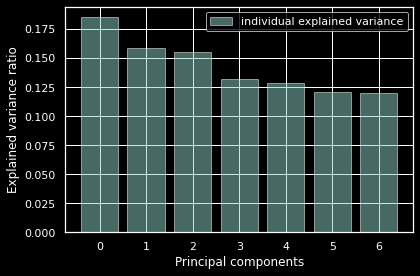

In [225]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [226]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
principal_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.297459,-0.142876,-0.343178,0.078496,0.259147,-0.065988,0.250095
1,0.300067,0.371871,0.204090,-0.290327,0.274578,0.132240,-0.089076
2,0.294344,0.124063,0.527775,0.404353,-0.143495,-0.069127,-0.126547
3,-0.099725,0.499338,-0.055110,-0.521014,-0.200935,0.500109,-0.071994
4,0.300618,-0.111430,-0.532487,-0.052520,-0.400477,-0.501156,0.058015
...,...,...,...,...,...,...,...
299995,-0.096303,-0.330792,-0.476015,-0.053162,-0.404252,-0.146658,-0.089996
299996,-0.498042,-0.037024,-0.421998,-0.158228,-0.054039,-0.351604,0.069746
299997,-0.505779,0.262626,-0.367631,0.362453,-0.129870,0.529468,-0.135357
299998,0.105055,-0.359289,0.357704,0.176262,0.250679,0.131005,0.581298


In [227]:
print(abs( pca.components_ ))


[[1.36385198e-03 3.06204079e-04 2.71995507e-03 1.06624901e-02
  2.00712971e-03 1.17585868e-02 9.99867324e-01]
 [1.30566438e-02 1.89720717e-03 7.07965099e-03 1.80963631e-02
  1.68284224e-01 9.85384114e-01 1.21199213e-02]
 [1.37069065e-02 6.91386023e-04 1.25219007e-03 5.09734966e-03
  9.85666040e-01 1.68067094e-01 3.03379932e-05]
 [1.15250188e-01 7.00046111e-03 1.19229280e-02 9.92970468e-01
  3.23029106e-03 2.05124846e-02 1.02315703e-02]
 [9.92586634e-01 3.12692845e-02 1.61447500e-02 1.15063765e-01
  1.10187639e-02 1.28309697e-02 2.76321988e-03]
 [4.28818352e-03 5.45641515e-01 8.37955676e-01 5.86271833e-03
  2.64200376e-03 6.47957018e-03 1.97422990e-03]
 [3.33251235e-02 8.37403362e-01 5.45314945e-01 1.63847107e-02
  1.42727430e-04 2.44023721e-03 1.49071369e-03]]


In [228]:
x.columns

Index(['LevelOfTrust', 'ScanTimeInSeconds', 'TotalBasketValue',
       'ScannedProducts', 'CountOfVoidedScans', 'ActivateWithoutScan',
       'ModifiedQuantities'],
      dtype='object')

<AxesSubplot:>

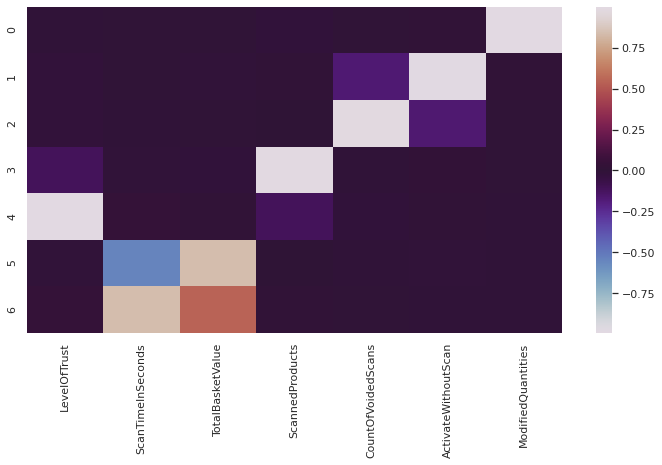

In [229]:
map= pd.DataFrame(pca.components_,columns=x.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

**We can again verify visually that Modified Qualtiles  is  the most important for PC1. Similarly, the features 'activatewithoutscan' and 'countof video scans 'are the most important for PC2.**

In [230]:
map

,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities
0,-0.001364,0.000306,0.002720,-0.010662,0.002007,0.011759,0.999867
1,-0.013057,0.001897,-0.007080,0.018096,-0.168284,-0.985384,0.012120
2,-0.013707,-0.000691,0.001252,0.005097,0.985666,-0.168067,0.000030
3,-0.115250,-0.007000,-0.011923,0.992970,-0.003230,0.020512,0.010232
4,-0.992587,0.031269,0.016145,-0.115064,-0.011019,0.012831,-0.002763
5,-0.004288,-0.545642,0.837956,0.005863,-0.002642,-0.006480,-0.001974
6,0.033325,0.837403,0.545315,0.016385,-0.000143,-0.002440,-0.001491


# Clustering

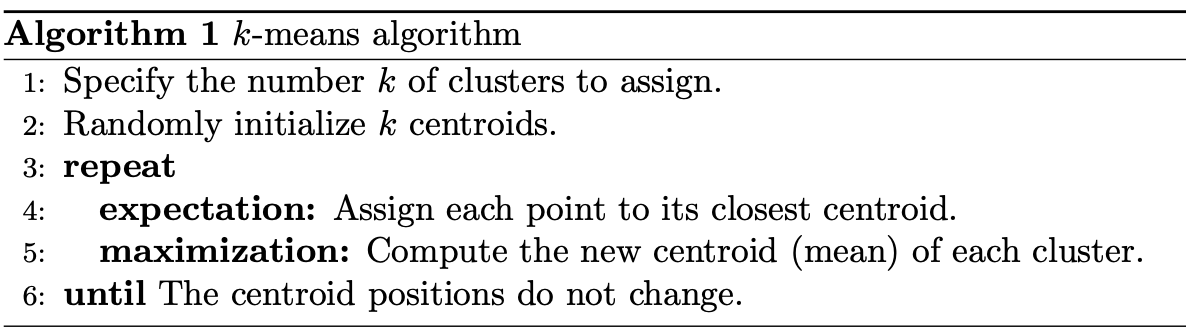

In [231]:
from sklearn.cluster import KMeans 
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [232]:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(x)
kmeans.fit(x)
#KMeans(n_clusters=3, max_iter=100,random_state=100)

KMeans()

In [233]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([5, 0, 6, ..., 5, 6, 2], dtype=int32)

Text(0, 0.5, 'WCSS')

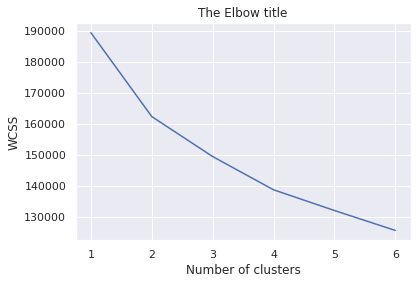

In [234]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**we will work with 3 clusters **

In [235]:
kmeans = KMeans(n_clusters=3,init='random', n_init=10, max_iter=500,tol=1e-04, random_state=100)
kmeans.fit(x)
    
cluster_labels = kmeans.labels_
 

In [236]:
# assign the label
x['Cluster_Id'] = kmeans.labels_
x.head()



,LevelOfTrust,ScanTimeInSeconds,TotalBasketValue,ScannedProducts,CountOfVoidedScans,ActivateWithoutScan,ModifiedQuantities,Cluster_Id
0,0.333333,0.729308,0.560713,0.566667,0.181818,0.7,0.2,0
1,0.333333,0.340968,0.545177,0.200000,0.636364,0.1,0.8,2
2,0.666667,0.400833,0.343119,0.933333,1.000000,0.3,0.8,2
3,0.833333,0.141593,0.855509,0.033333,0.363636,0.0,0.4,0
4,1.000000,0.786569,0.083397,0.500000,0.000000,0.7,0.8,2


<AxesSubplot:xlabel='Cluster_Id', ylabel='LevelOfTrust'>

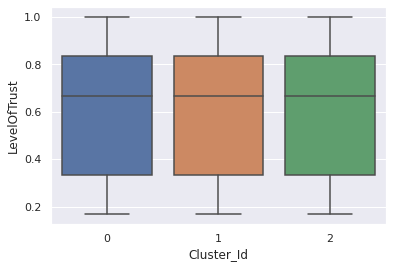

In [237]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='LevelOfTrust', data=x)

<AxesSubplot:xlabel='Cluster_Id', ylabel='TotalBasketValue'>

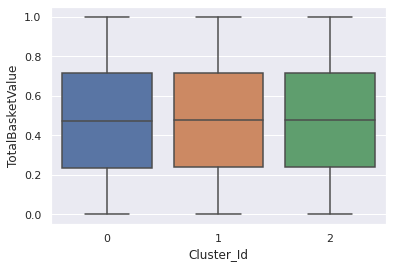

In [238]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='TotalBasketValue', data=x)

<AxesSubplot:xlabel='Cluster_Id', ylabel='ScanTimeInSeconds'>

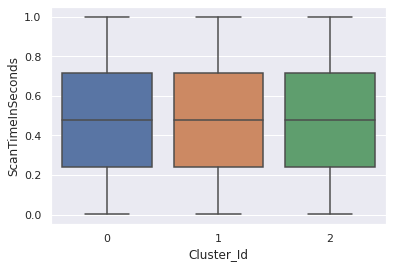

In [239]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='ScanTimeInSeconds', data=x)

In [240]:
kmeans.cluster_centers_

array([[0.58439176, 0.47618013, 0.47518304, 0.51630892, 0.20829548,
        0.49975986, 0.257615  ],
       [0.58419623, 0.47579515, 0.47780728, 0.51814026, 0.79148865,
        0.50074289, 0.25629743],
       [0.58361816, 0.4770812 , 0.47676747, 0.51426451, 0.50005762,
        0.50032253, 0.84030873]])

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.
The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.
The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

 K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.
Inertia
Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [241]:
kmeans.inertia_

149755.18877334378

The lesser the model inertia, the better the model fit.

We can see that the model has very high inertia. So, this is not a good model fit to the data.